# **<center><b>Caso Cancer de Mama - Rnadom Forest </b></center>**

## <center><h2><b>1.1. Preparación del modelo</b></h2></center>

### <center><h2><b>1.1. Importar Librerias</b></h2></center>

In [ ]:
# Import Cancer de Mama Dataset
from sklearn.datasets import load_breast_cancer

# Import Sckti-learn ml  Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    r2_score
)
from sklearn.ensemble import RandomForestClassifier

# Import Confussion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Import saving ml model
import joblib

# Import other ml libraries
import numpy as np
import pandas as pd

### <center><h2><b>1.2. Carga de Datos de Cancer de mama dataset</b></h2></center>

In [ ]:
# Load Breast Cancer dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

## <center><h2><b>2. Entrenamiento del modelo </b></h2></center>

### <center><h2><b>2.1. Dividir entre Test y Training Data</b></h2></center>

In [ ]:
# Split train and test dataset (20% Test and 80% Training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 455 samples
Test set size: 114 samples


### <center><h2><b>2.2. Definir HyperParamteros </b></h2></center>

In [ ]:
# # Normalize scalability on each X feature
# scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning with GridSearchCV
print("Performing hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

Performing hyperparameter tuning...


### <center><h2><b>2.3. Realización de Predicciones</b></h2></center>

In [ ]:
# Create base model
rf_model = RandomForestClassifier(random_state=42, criterion='entropy')

# Setup GridSearchCV with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best model
model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

# Make predictions
y_pred = model.predict(X_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV accuracy: 0.9670


In [ ]:
# # Training Random Forest model
# model = RandomForestClassifier(n_estimators=10, max_depth=4, criterion='entropy', random_state=42)
# model.fit(X_train, y_train)

# # Making predictions using test data
# y_pred = model.predict(X_test)

# # Convert the likelyhood into binary label (0 o 1)
# y_pred = (y_pred > 0.5)

## <center><h2><b>3. Visualizaciones</b></h2></center>

### <center><h2><b>3.1. Gráfica de Matriz de Confusión</b></h2></center>

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


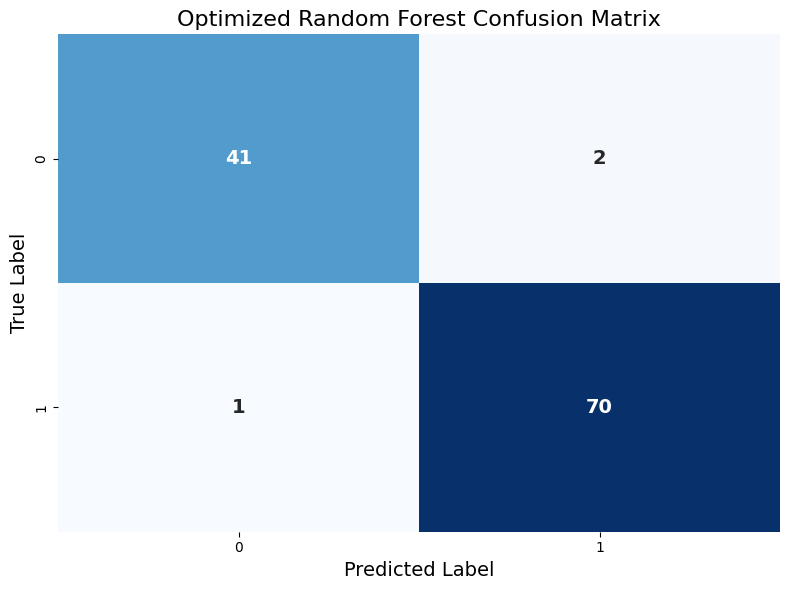

In [18]:
# Show the training model
print(classification_report(y_test, y_pred))
# Evaluation report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heat Map Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Optimized Random Forest Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()

### <center><h2><b>3.2. Gráfico Curva ROC</b></h2></center>

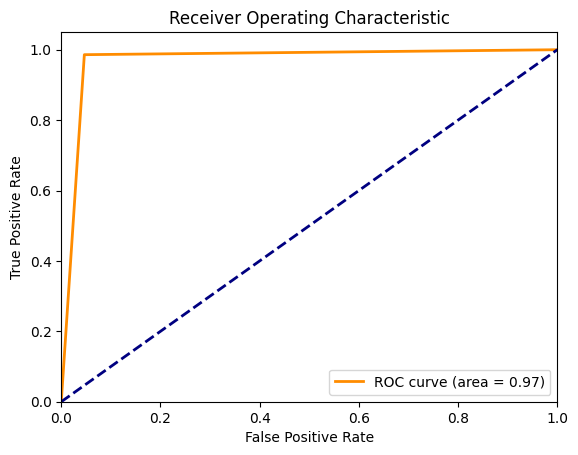

In [ ]:
# ROC Curve
auc = roc_auc_score(y_test, y_pred)
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### <center><h2><b>3.3. Gráfica de Importancia</b></h2></center>

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Variable': dataset.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))


Top 10 Important Features:
                Variable  Importance
22       worst perimeter    0.128876
23            worst area    0.124634
27  worst concave points    0.117887
7    mean concave points    0.111025
20          worst radius    0.073131
6         mean concavity    0.051388
26       worst concavity    0.046193
0            mean radius    0.045491
3              mean area    0.037978
2         mean perimeter    0.033839


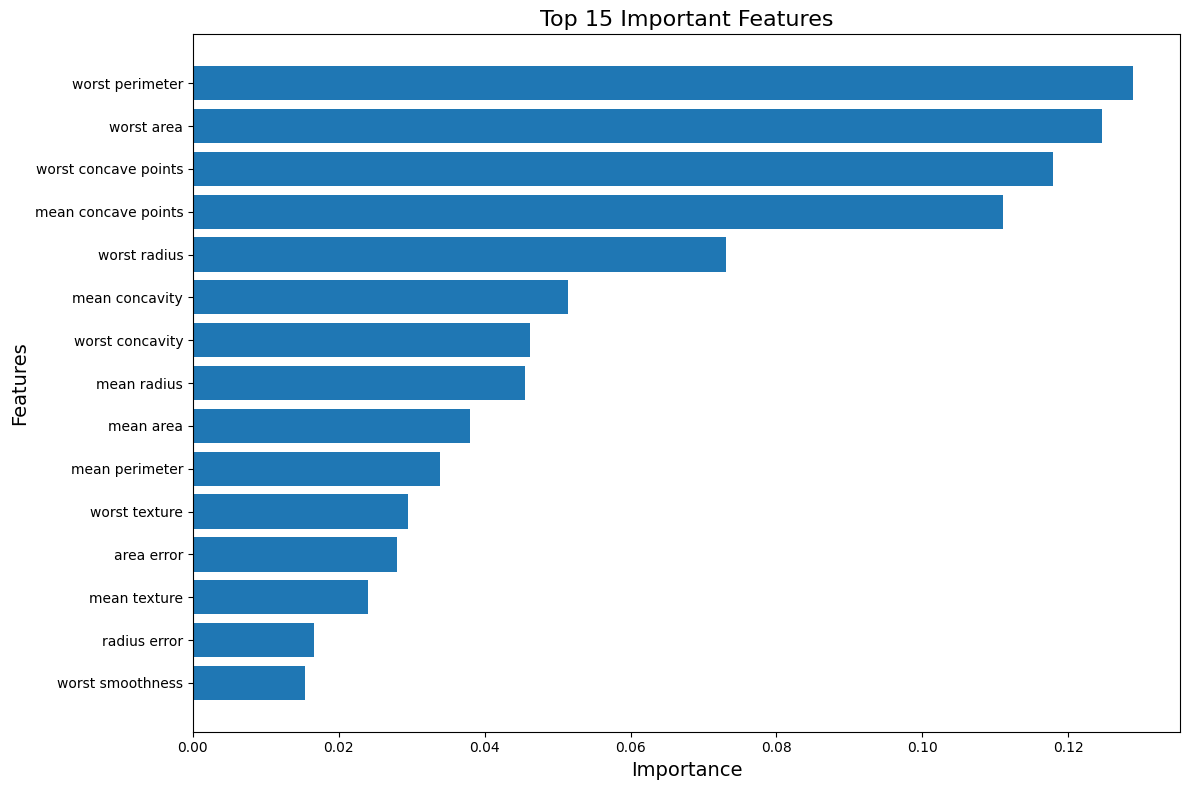

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'][:15], feature_importances['Importance'][:15])
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 15 Important Features', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

## <center><h2><b>4. Evaluacion de Métricas</b></h2></center>

In [17]:
# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Specificity": recall_score(y_test, y_pred, pos_label=0),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC Score": roc_auc_score(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

print("\nOptimized Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


Optimized Model Metrics:
Accuracy: 0.9737
Recall (Sensitivity): 0.9859
Precision: 0.9722
Specificity: 0.9535
F1 Score: 0.9790
ROC AUC Score: 0.9697
R2 Score: 0.8880


## <center><h2><b>5. Guardado del Modelo</b></h2></center>

In [ ]:
# Save model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [ ]:
# Load saved model
loaded_model = joblib.load('random_forest_model.pkl')

# making predictions with loaded model
y_pred = model.predict(X_test)

## <center><h2><b>6. Validación del Resultado</b></h2></center>

In [ ]:
# Validate loaded model
y_pred_loaded = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded model accuracy: {acc_loaded:.4f} (original: {metrics['Accuracy']:.4f})")

Loaded model accuracy: 0.9737 (original: 0.9737)
